In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [8]:
data=pd.read_csv('/content/car_evaluation.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [10]:
x=data.drop('vhigh',axis=1)
y=data['vhigh']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(x)
print(y)

     vhigh.1      2   2.1  small   low  unacc
0      vhigh      2     2  small   med  unacc
1      vhigh      2     2  small  high  unacc
2      vhigh      2     2    med   low  unacc
3      vhigh      2     2    med   med  unacc
4      vhigh      2     2    med  high  unacc
...      ...    ...   ...    ...   ...    ...
1722     low  5more  more    med   med   good
1723     low  5more  more    med  high  vgood
1724     low  5more  more    big   low  unacc
1725     low  5more  more    big   med   good
1726     low  5more  more    big  high  vgood

[1727 rows x 6 columns]
0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1722      low
1723      low
1724      low
1725      low
1726      low
Name: vhigh, Length: 1727, dtype: object


In [12]:
categorical_features = x.select_dtypes(include=['object']).columns

In [13]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [14]:
encoded_features = encoder.fit_transform(x[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))


In [15]:
x = x.drop(categorical_features, axis=1)
x = pd.concat([x, encoded_df], axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
clf = DecisionTreeClassifier()
clf.fit(x_train , y_train)

DecisionTreeClassifier()

In [18]:
y_pred=clf.predict(x_test)
print(y_pred)

['low' 'high' 'med' 'high' 'high' 'low' 'high' 'low' 'high' 'med' 'low'
 'high' 'high' 'high' 'med' 'med' 'vhigh' 'high' 'low' 'high' 'low' 'high'
 'med' 'low' 'high' 'med' 'med' 'high' 'high' 'low' 'low' 'high' 'high'
 'low' 'high' 'low' 'low' 'high' 'med' 'med' 'vhigh' 'med' 'low' 'med'
 'high' 'low' 'high' 'low' 'high' 'high' 'low' 'low' 'low' 'low' 'vhigh'
 'vhigh' 'high' 'high' 'low' 'vhigh' 'low' 'high' 'high' 'low' 'high'
 'low' 'low' 'low' 'low' 'high' 'low' 'low' 'high' 'low' 'low' 'med'
 'vhigh' 'low' 'high' 'vhigh' 'low' 'high' 'high' 'low' 'high' 'low'
 'high' 'high' 'vhigh' 'high' 'high' 'med' 'high' 'high' 'high' 'high'
 'med' 'low' 'low' 'high' 'high' 'high' 'high' 'high' 'high' 'med' 'low'
 'high' 'high' 'med' 'high' 'low' 'low' 'high' 'high' 'high' 'high' 'low'
 'low' 'high' 'high' 'high' 'high' 'vhigh' 'med' 'high' 'med' 'low' 'low'
 'low' 'low' 'low' 'high' 'low' 'low' 'high' 'high' 'high' 'low' 'high'
 'high' 'low' 'low' 'med' 'vhigh' 'med' 'high' 'low' 'high' 'low'

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[18] <= 0.5\ngini = 0.75\nsamples = 1381\nvalue = [351, 344, 349, 337]'),
 Text(0.3076923076923077, 0.625, 'x[20] <= 0.5\ngini = 0.749\nsamples = 1327\nvalue = [351.0, 307.0, 332.0, 337.0]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[19] <= 0.5\ngini = 0.748\nsamples = 1279\nvalue = [351, 280, 311, 337]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.741\nsamples = 307\nvalue = [93.0, 66.0, 89.0, 59.0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.747\nsamples = 972\nvalue = [258, 214, 222, 278]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= 0.5\ngini = 0.492\nsamples = 48\nvalue = [0, 27, 21, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.499\nsamples = 40\nvalue = [0, 19, 21, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0]'),
 Text(0.8461538461538461, 0.625, 'x[2] <= 0.5\ngini = 0.431\nsamples = 54\nvalue = [0, 37, 17, 0]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Tex

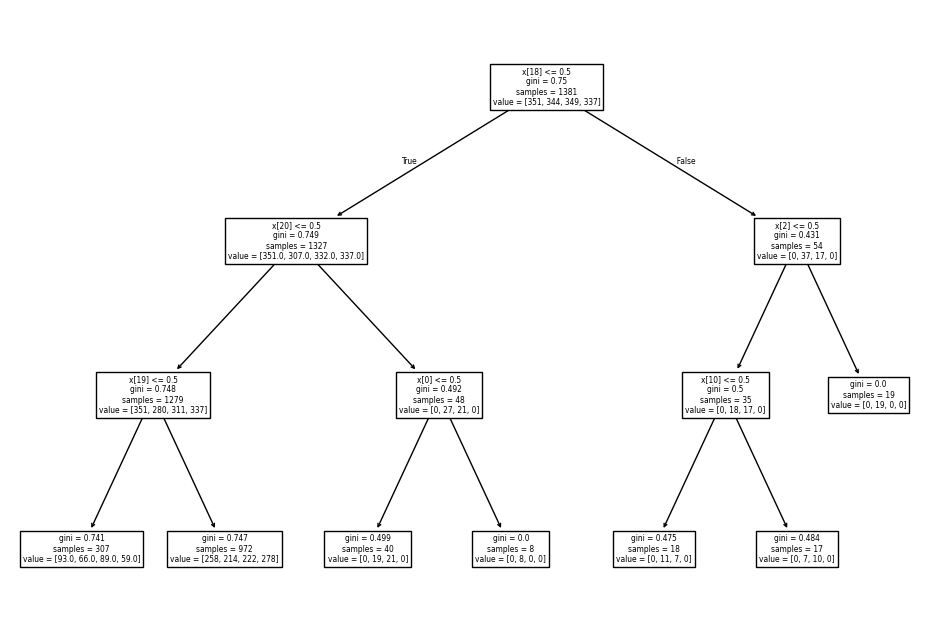

In [21]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train , y_train))

In [22]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array(['vhigh', 'vhigh', 'vhigh', ..., 'vhigh', 'vhigh', 'high'],
      dtype=object)

In [23]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[18] <= 0.5\nentropy = 2.0\nsamples = 1381\nvalue = [351, 344, 349, 337]'),
 Text(0.3076923076923077, 0.625, 'x[20] <= 0.5\nentropy = 1.998\nsamples = 1327\nvalue = [351.0, 307.0, 332.0, 337.0]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[19] <= 0.5\nentropy = 1.995\nsamples = 1279\nvalue = [351, 280, 311, 337]'),
 Text(0.07692307692307693, 0.125, 'entropy = 1.974\nsamples = 307\nvalue = [93.0, 66.0, 89.0, 59.0]'),
 Text(0.23076923076923078, 0.125, 'entropy = 1.992\nsamples = 972\nvalue = [258, 214, 222, 278]'),
 Text(0.46153846153846156, 0.375, 'x[0] <= 0.5\nentropy = 0.989\nsamples = 48\nvalue = [0, 27, 21, 0]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.998\nsamples = 40\nvalue = [0, 19, 21, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0]'),
 Text(0.8461538461538461, 0.625, 'x[2] <= 0.5\nentropy = 0.899\nsamples = 54\nvalue = [0, 37, 17, 0]'),
 Text(0.71153846153846

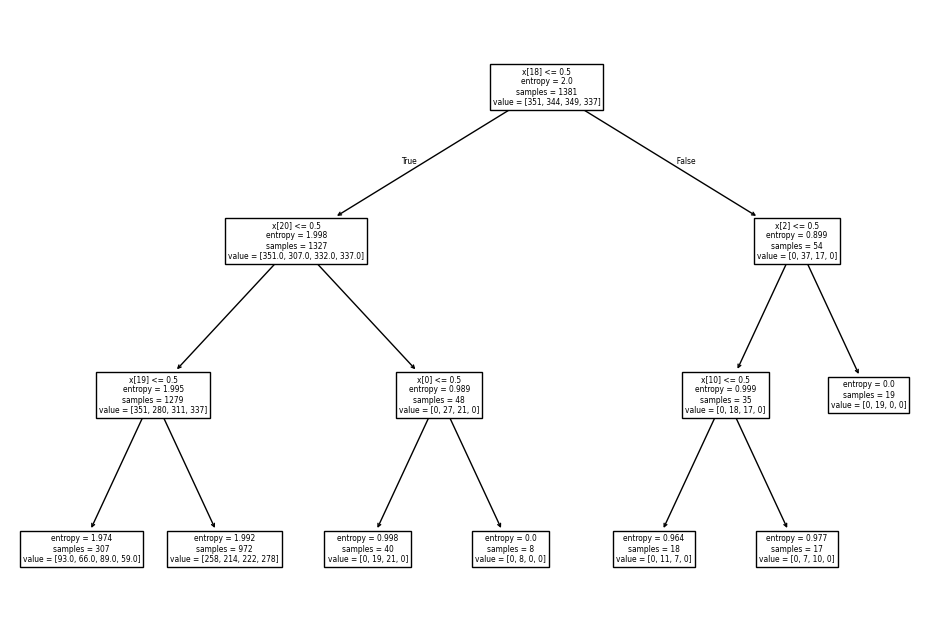

In [24]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train, y_train))